<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

--- 
**Primary Learning Objectives:**
1. Collect posts from two subreddits of our choice. 
2. Use NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.

---

## Contents:
- Data Cleaning
- Data Modelling
- Recommendations and Conclusions

## Import Libraries

In [1]:
# Python Collection
from collections import Counter

# For Loop Verbose
from tqdm import tqdm

# String
import string

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Numerical Data
import numpy as np

# Machine Learning
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

## Import Datasets

In [2]:
#Import datasets scrapped from Reddit
df_r1 = pd.read_csv('../data/retirement_a.csv')
df_r2 = pd.read_csv('../data/retirement_b.csv')
df_f1 = pd.read_csv('../data/fp_a.csv')
df_f2 = pd.read_csv('../data/fp_b.csv')

## Data Dictionary

|Feature|Type|Description|
|---|---|---|
|subreddit|object| Retirement, Financial Planning|
|selftext|object|Reddit poster's body text|
|title|object|Reddit poster's title text|
|content|object|Reddit poster's selftext+title|

## Data Cleaning
Merging and cleaning of the datasets for further analysis.

In [3]:
#Select only the desired columns
df_r1 = df_r1[['title', 'selftext', 'subreddit']]
df_r2 = df_r2[['title', 'selftext', 'subreddit']]
df_f1 = df_f1[['title', 'selftext', 'subreddit']]
df_f2 = df_f2[['title', 'selftext', 'subreddit']]

In [4]:
#Check dataframe
df_r1.head(3)

,title,selftext,subreddit
0,Anyone who’s moved into a retirement (55+) com...,NaN,retirement
1,Am I the only one out there wondering if I can...,"Seriously, with a small nest egg being managed...",retirement
2,Your current status and your future wishes for...,I'll start\n\nLow 50's DINK's\n\nWife and I ha...,retirement


In [5]:
#Check dataframe
df_r1.tail(3)

,title,selftext,subreddit
997,Want to open a retirement account. Need some a...,I am currently 25 years old and am thinking of...,retirement
998,How Retirees Can Avoid Running Out of Money: T...,NaN,retirement
999,Can I front-load my 401k to the Annual Max if ...,Just what it says. Any reason why I cannot def...,retirement


In [6]:
#Check dataframe
df_r2.head(3)

,title,selftext,subreddit
0,Tips for Women to Looking Fantastic at 55+,NaN,retirement
1,[Perfect gift for Retirees] Humour t-shirt and...,NaN,retirement
2,Retirement investing through the decades: What...,NaN,retirement


In [7]:
#Check dataframe
df_r2.tail(3)

,title,selftext,subreddit
997,Saving For Retirement: 7 Reasons Why You May H...,NaN,retirement
998,Why more Americans are putting their eggs in R...,NaN,retirement
999,The 5 Benefits of Having a Revocable Trust,NaN,retirement


In [8]:
#Check dataframe
df_f1.head(3)

,title,selftext,subreddit
0,How to save for younger sibling.,I (25) have a 9 year old sibling and I would l...,FinancialPlanning
1,What to do now am I missing anything?,NaN,FinancialPlanning
2,"32k in bank account, what do?",I have 32k in my bank account (life savings) a...,FinancialPlanning


In [9]:
#Check dataframe
df_f1.tail(3)

,title,selftext,subreddit
997,"If I had $60,000 to invest conservatively for ...",The bonds have a much higher rate than T Bills...,FinancialPlanning
998,"I need your help, 100 participants needed to a...",[removed],FinancialPlanning
999,What are some behavioral characteristics of hi...,[removed],FinancialPlanning


In [10]:
#Check dataframe
df_f2.head(3)

,title,selftext,subreddit
0,Behavior of high NW individuals,[removed],FinancialPlanning
1,I need help finding my budget,New college grad\n\nSo I’m 23 and I recently g...,FinancialPlanning
2,New college grad,[removed],FinancialPlanning


In [11]:
#Check dataframe
df_f2.tail(3)

,title,selftext,subreddit
997,25yo and £3k in debt with no savings,"I have a full time job, should i start paying ...",FinancialPlanning
998,Struggling to Pick Financial Advisor,[removed],FinancialPlanning
999,"What are your financial, dreams plans and goals?",I'm working on starting my financial new year ...,FinancialPlanning


In [12]:
#Combine to a single dataframe for ease of manipulation
df_combined = pd.concat([df_r1, df_r2, df_f1, df_f2], ignore_index=True)

In [13]:
#Check the combined dataset
df_combined

,title,selftext,subreddit
0,Anyone who’s moved into a retirement (55+) com...,NaN,retirement
1,Am I the only one out there wondering if I can...,"Seriously, with a small nest egg being managed...",retirement
2,Your current status and your future wishes for...,I'll start\n\nLow 50's DINK's\n\nWife and I ha...,retirement
3,DIY investing of IRA during retirement. Who to...,After doing research on the difference in retu...,retirement
4,The r/retirement community has 19.8k members.,"From one (low) to ten (high), how important is...",retirement
...,...,...,...
3995,Home buying and DTI,[removed],FinancialPlanning
3996,Struggling to Pick a Financial Advisor After M...,Been shopping around for a financial advisor a...,FinancialPlanning
3997,25yo and £3k in debt with no savings,"I have a full time job, should i start paying ...",FinancialPlanning
3998,Struggling to Pick Financial Advisor,[removed],FinancialPlanning


In [14]:
df_combined.shape

(4000, 3)

In [15]:
#Compute the number of duplicated rows in the dataframe
sum(df_combined.duplicated(subset='selftext').astype(int))

2169

Observations:

- 4,000 rows and 3 columns. Seems ok.
- To get rid of selftext entries that reflects [removed] and replace with null value since does are nill inputs. Also noticed from entries before that there are hyperlinks and non-english words. Similarly, these are among other things to be cleaned further.
- While there are several empty rows for selftext, we will not drop them.  Instead, we will  create a combined content field merging contents from the title and selftext since inputs from title field are fairly substantive.

In [16]:
# Replace [removed] with NaN in the selftext column
df_combined['selftext'] = df_combined['selftext'].replace('[removed]', float('nan'))

In [17]:
#Create a new column combining title and self-text
df_combined['content'] = df_combined['title'].fillna('') + ' ' +df_combined['selftext'].fillna('')

In [18]:
#Check out that new content column is populated correctly
df_combined

,title,selftext,subreddit,content
0,Anyone who’s moved into a retirement (55+) com...,NaN,retirement,Anyone who’s moved into a retirement (55+) com...
1,Am I the only one out there wondering if I can...,"Seriously, with a small nest egg being managed...",retirement,Am I the only one out there wondering if I can...
2,Your current status and your future wishes for...,I'll start\n\nLow 50's DINK's\n\nWife and I ha...,retirement,Your current status and your future wishes for...
3,DIY investing of IRA during retirement. Who to...,After doing research on the difference in retu...,retirement,DIY investing of IRA during retirement. Who to...
4,The r/retirement community has 19.8k members.,"From one (low) to ten (high), how important is...",retirement,The r/retirement community has 19.8k members. ...
...,...,...,...,...
3995,Home buying and DTI,NaN,FinancialPlanning,Home buying and DTI
3996,Struggling to Pick a Financial Advisor After M...,Been shopping around for a financial advisor a...,FinancialPlanning,Struggling to Pick a Financial Advisor After M...
3997,25yo and £3k in debt with no savings,"I have a full time job, should i start paying ...",FinancialPlanning,25yo and £3k in debt with no savings I have a ...
3998,Struggling to Pick Financial Advisor,NaN,FinancialPlanning,Struggling to Pick Financial Advisor


In [19]:
#Export combined dataset
df_combined.to_csv('../data/combinedscrape.csv')

In [20]:
#Check out the combined dataset
df_combined.describe(include='all')

,title,selftext,subreddit,content
count,4000,1864,4000,4000
unique,3913,1829,2,3935
top,'Moronic' Monday - Your weekly thread for the ...,[deleted],retirement,'Moronic' Monday - Your weekly thread for the ...
freq,9,22,2000,9


Observations:
- 65 duplicate entires under content. To remove them.

In [21]:
#Remove duplicates in the new combined content column
df_combined.drop_duplicates(subset='content', inplace = True)

In [22]:
#Check that duplicates have been removed
df_combined.describe(include='all')

,title,selftext,subreddit,content
count,3935,1856,3935,3935
unique,3913,1829,2,3935
top,Free chair yoga book,[deleted],retirement,Anyone who’s moved into a retirement (55+) com...
freq,5,22,1970,1


In [23]:
#Understand characteristics of the dataframe
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3935 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      3935 non-null   object
 1   selftext   1856 non-null   object
 2   subreddit  3935 non-null   object
 3   content    3935 non-null   object
dtypes: object(4)
memory usage: 153.7+ KB


In [24]:
#Drop empty rows for content
df_combined.dropna(subset=['content'], inplace=True)

In [25]:
#Check out the dataframe
df_combined.describe(include='all')

,title,selftext,subreddit,content
count,3935,1856,3935,3935
unique,3913,1829,2,3935
top,Free chair yoga book,[deleted],retirement,Anyone who’s moved into a retirement (55+) com...
freq,5,22,1970,1


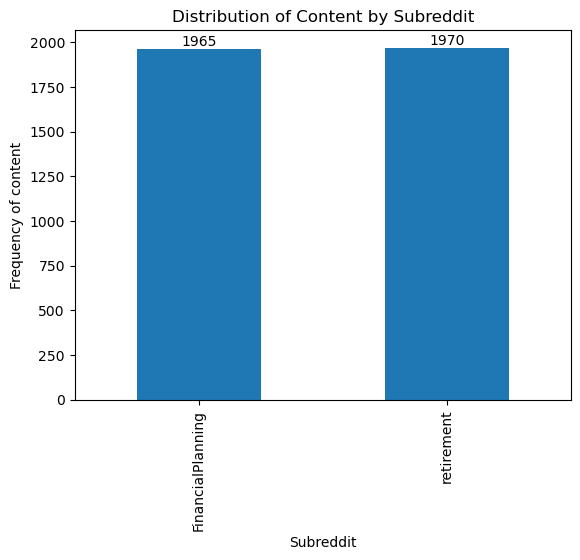

In [26]:
# Group content by subreddit and count the number of non-null values in content column
subreddit_counts = df_combined.groupby('subreddit')['content'].count()

#Check the number of contents for each subreddit
subreddit_counts.plot(kind='bar')
plt.xlabel('Subreddit')
plt.ylabel('Frequency of content')
plt.title('Distribution of Content by Subreddit')

#Add annotations
for i, count in enumerate(subreddit_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
    
plt.show()

Observations:
- Fairly equal distribution of entries under financial planning and retirement subreddit. 
- This is good as we should maintain class balance so that the classifier does not become overly specialised in recognising a particular attribute resulting in poorer performance in the others.

In [27]:
#Reset index
df_combined.reset_index(drop=True, inplace=True)

In [28]:
#Check no. of rows and columns
df_combined.shape

(3935, 4)

In [29]:
#View first five rows
df_combined.head()

,title,selftext,subreddit,content
0,Anyone who’s moved into a retirement (55+) com...,NaN,retirement,Anyone who’s moved into a retirement (55+) com...
1,Am I the only one out there wondering if I can...,"Seriously, with a small nest egg being managed...",retirement,Am I the only one out there wondering if I can...
2,Your current status and your future wishes for...,I'll start\n\nLow 50's DINK's\n\nWife and I ha...,retirement,Your current status and your future wishes for...
3,DIY investing of IRA during retirement. Who to...,After doing research on the difference in retu...,retirement,DIY investing of IRA during retirement. Who to...
4,The r/retirement community has 19.8k members.,"From one (low) to ten (high), how important is...",retirement,The r/retirement community has 19.8k members. ...


#### Text Cleaning
Transform the raw text data for analysis. This would include removing punctuation and special characters, stop words, tokenizing the text, lemmatization to improve the accuracy of the analysis by reducing noise and irrelevant info in the text data.

In [30]:
#Define function to remove non english words
english_words = set(nltk.corpus.words.words())

def remove_non_english_words(text):
    words = nltk.word_tokenize(text.lower())
    words = [w for w in words if w in english_words]
    return " ".join(words)

In [31]:
#Define function to map the input text to corresponding WordNet tag
def get_wordnet_tag(tag):
    if tag == 'ADJ':
        return 'j'
    elif tag == 'VERB':
        return 'v'
    elif tag == 'NOUN':
        return 'n'
    elif tag == 'ADV':
        return 'r'
    else:
        return 'n'

In [32]:
#Lemmatize text in the content column
def lemmatize_text(content):
    stop = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()

    words = list()
    content = word_tokenize(content)
    for word, tag in pos_tag(content):
        tag = get_wordnet_tag(tag)
        word = lemmatizer.lemmatize(word, tag)
        if word not in stop:
            words.append(word)
    
    return ' '.join(words)   

In [33]:
#Define clean text function 

def clean_text(df_combined):
    
    tqdm.pandas()  # Enable progress bar support for the 'apply' method that is called later
        
    df_combined['content_cleaned'] = df_combined['content'].str.lower() #Create new column for the cleaned content, and convert text to lowercase for standardisation
    
    df_combined['content_cleaned'] = df_combined['content_cleaned'].progress_apply(remove_non_english_words) #Remove non-english words   
    
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace(r'\[oc\]', ' ') #Using regex to replace any special characters & symbols irrelevant for analysis and to reduce noise
    pattern_link = r'https?://[^\s]+|www\.[^\s]+|[^\s]+\.com[^\s]*|[^\s]+\.org[^\s]*|[^\s]+\.html[^\s]*'
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace(pattern_link, ' link ') #Replace occurence of URL with word link 
    
    pattern_punctuation = r'[' + string.punctuation + '’]' 
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace(pattern_punctuation, '') #Remove punctuation by replacing with space
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace(r' [\d]+ |^[\d]+ | [\d]+$', ' ') #Removing digits that appear as separate tokens/beginning/end of strings as a space to reduce variations in the data
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace(r'[^\w\d\s]+', ' ') #Remove non-alphanumeric characters and replace with space 

    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('retirement', '') #Remove obvious keywords that belong to the subreddit
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('financial planning', '') #Remove obvious keywords that belong to the subreddit
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('im', '') #Manually replace words that are superfluous and have high counts as observed via EDA
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('thanks', '') #Manually replace words that are superfluous and have high counts as observed via EDA
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('dont', '') #Manually replace words that are superfluous and have high counts as observed via EDA
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('would', '') #Manually replace words that are superfluous and have high counts as observed via EDA
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('like', '') #Manually replace words that are superfluous and have high counts as observed via EDA
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('wa', '') #Manually replace words that are superfluous and have high counts as observed via EDA
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace('te', '') #Manually replace words that are superfluous and have high counts as observed via EDA
    
    df_combined['content_cleaned'] = df_combined['content_cleaned'].progress_apply(lambda title: lemmatize_text(title)) #Apply lemmatization to cleaned contents via progress_apply method
   
    df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace(r'\s[\s]+', ' ') #Remove extra whitespace


In [34]:
#Apply clean text function & check the cleaned data
clean_text(df_combined)
df_combined

100%|██████████| 3935/3935 [00:01<00:00, 2668.56it/s]
/var/folders/qd/bsjdfyz95kd_gl4thk_2jhx80000gn/T/ipykernel_13340/1359866741.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace(r'\[oc\]', ' ') #Using regex to replace any special characters & symbols irrelevant for analysis and to reduce noise
/var/folders/qd/bsjdfyz95kd_gl4thk_2jhx80000gn/T/ipykernel_13340/1359866741.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace(pattern_link, ' link ') #Replace occurence of URL with word link
/var/folders/qd/bsjdfyz95kd_gl4thk_2jhx80000gn/T/ipykernel_13340/1359866741.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combined['content_cleaned'] = df_combined['content_cleaned'].str.replace

,title,selftext,subreddit,content,content_cleaned
0,Anyone who’s moved into a retirement (55+) com...,NaN,retirement,Anyone who’s moved into a retirement (55+) com...,anyone community
1,Am I the only one out there wondering if I can...,"Seriously, with a small nest egg being managed...",retirement,Am I the only one out there wondering if I can...,one wondering ever retire seriously small nest...
2,Your current status and your future wishes for...,I'll start\n\nLow 50's DINK's\n\nWife and I ha...,retirement,Your current status and your future wishes for...,current status future start low wife employed ...
3,DIY investing of IRA during retirement. Who to...,After doing research on the difference in retu...,retirement,DIY investing of IRA during retirement. Who to...,use holding institution fund afr research diff...
4,The r/retirement community has 19.8k members.,"From one (low) to ten (high), how important is...",retirement,The r/retirement community has 19.8k members. ...,community one low n high portant community par...
...,...,...,...,...,...
3930,Home buying and DTI,NaN,FinancialPlanning,Home buying and DTI,home
3931,Struggling to Pick a Financial Advisor After M...,Been shopping around for a financial advisor a...,FinancialPlanning,Struggling to Pick a Financial Advisor After M...,struggling pick financial advisor afr multiple...
3932,25yo and £3k in debt with no savings,"I have a full time job, should i start paying ...",FinancialPlanning,25yo and £3k in debt with no savings I have a ...,debt full job start paying majority debt save ...
3933,Struggling to Pick Financial Advisor,NaN,FinancialPlanning,Struggling to Pick Financial Advisor,struggling pick financial advisor


## Export Cleaned Data

In [35]:
# Save out cleaned data
df_combined.to_csv('../data/cleaneddata.csv', index=False)

## Exploratory Data Analysis (EDA)

Glean preliminary insights from topline findings via the WordCloud 

In [36]:
#Define function for wordcloud

def wordcloud(dataset, min_freq=1):
    bow = list()
    for content in tqdm(df_combined['content_cleaned']):
        bow += word_tokenize(content)
    
    word_freq = dict()
    counter = Counter(bow)
    for word, freq in counter.items():
        if freq >= min_freq:
            word_freq[word] = freq

    wc = WordCloud(width=600, height=600, background_color='white') 
    wc = wc.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(7, 7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    return counter, word_freq

100%|██████████| 3935/3935 [00:00<00:00, 10187.07it/s]


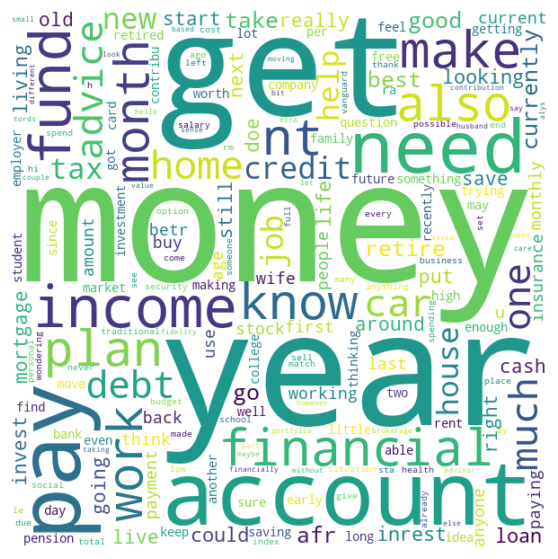

In [37]:
counter, content_freq = wordcloud(df_combined)

Observations:
- For words such as 'im' appearing in the word cloud, likely becauase the pos_tag in code above breaks up word into i m

#### Count Vectorizer

In [38]:
#Count vectorizer to convert text to matrix of token counts

def count_vectorize(df_combined):
    
    vectorizer = CountVectorizer()
    
    documents = list()
    for content in tqdm(df_combined['content_cleaned']):
        documents.append(content)
    document_vector = vectorizer.fit_transform(documents)
    return vectorizer, document_vector

In [39]:
#Store the outputs for further analysis subsequently
cv, cv_encoded = count_vectorize(df_combined)

100%|██████████| 3935/3935 [00:00<00:00, 3279925.72it/s]


In [40]:
#Check the number of unique words from the countvectorizer
cv_encoded.shape

(3935, 5444)

In [41]:
#Check that the encoding process worked
for i, j in zip(cv_encoded.nonzero()[0][:30], cv_encoded.nonzero()[1][:30]):
    print('({:4}, {:8}({:15})) -> {}'.format(i, j, cv.get_feature_names_out()[j], cv_encoded[i, j]))

(   0,      243(anyone         )) -> 1
(   0,      926(community      )) -> 1
(   1,     3294(one            )) -> 2
(   1,     5378(wondering      )) -> 1
(   1,     1712(ever           )) -> 1
(   1,     4097(retire         )) -> 1
(   1,     4351(seriously      )) -> 1
(   1,     4486(small          )) -> 1
(   1,     3194(nest           )) -> 1
(   1,     1562(egg            )) -> 1
(   1,     1885(fidelity       )) -> 1
(   1,     2934(market         )) -> 1
(   1,     2708(last           )) -> 1
(   1,     2908(make           )) -> 1
(   1,      425(barley         )) -> 1
(   1,     1640(enough         )) -> 1
(   1,     3435(pay            )) -> 1
(   1,     3604(portion        )) -> 1
(   1,     2817(living         )) -> 1
(   1,     4647(starting       )) -> 1
(   1,     4891(think          )) -> 1
(   1,     5389(working        )) -> 1
(   1,     4924(till           )) -> 1
(   1,     1494(drop           )) -> 1
(   1,       75(add            )) -> 1
(   1,     4303(second   

#### TF-IDF Vectorizer

In [42]:
#Use tf-idf to perform vectorization for text data

def tfidf_vectorize(df_combined):
    vectorizer = TfidfVectorizer()
    
    documents = list()
    for content in tqdm(df_combined['content_cleaned']):
        documents.append(content)
    document_vector = vectorizer.fit_transform(documents)
    return vectorizer, document_vector

In [43]:
tfidf, tfidf_encoded = tfidf_vectorize(df_combined)

100%|██████████| 3935/3935 [00:00<00:00, 2978629.53it/s]


In [44]:
tfidf_encoded.shape

(3935, 5444)

In [45]:
#Get summary of the most important terms nin the preprocessed text data based on their tf-idf scores
for i, j in zip(tfidf_encoded.nonzero()[0][:30], tfidf_encoded.nonzero()[1][:30]):
    print('({:4}, {:8}({:15})) -> {}'.format(i, j, tfidf.get_feature_names_out()[j], tfidf_encoded[i, j]))

(   0,      926(community      )) -> 0.8157477556674223
(   0,      243(anyone         )) -> 0.578407813850715
(   1,     1843(fast           )) -> 0.1755392925081615
(   1,     4135(rising         )) -> 0.18284619894157977
(   1,     1718(everything     )) -> 0.12754892992625788
(   1,     3477(person         )) -> 0.14164670824494055
(   1,     4169(rou            )) -> 0.16851660861608747
(   1,     2144(go             )) -> 0.09559357465204087
(   1,     3293(older          )) -> 0.1502630241656315
(   1,     2861(lot            )) -> 0.10894569052791629
(   1,     4310(security       )) -> 0.12119725396703182
(   1,     2912(man            )) -> 0.1808276647903082
(   1,     3199(never          )) -> 0.11830568947595678
(   1,     4453(situation      )) -> 0.11889999115544322
(   1,     2149(golden         )) -> 0.18502638191385348
(   1,     1908(find           )) -> 0.23138369340151835
(   1,     2957(may            )) -> 0.11678150185936062
(   1,     1376(discrination   )) -> 

## Data Modelling

The general scehma of the model are as follows:

1. [Model A] Multinomial Naive Bayes with Count Vectorizer - Baseline Model
2. [Model B] Multinomial Naive Bayes with TF-IDF Vectorizer
3. [Model C] GridSearch CV over 4 models (i) Multinomial NB with CountVectorizer; (ii) Multinomial NB with Tfidf Vectorizer; (iii) LogisticRegression with CountVectorizer; (iv) LogisticRegression with Tfidf Vectorizer
4. [Model D] Gradient Boosting 

In [46]:
#Create outcome variable y which will be the same for all models.
y = np.array(df_combined['subreddit'])

In [47]:
X = df_combined['content_cleaned']

In [48]:
# conduct train-test-split for model tuning and evaluation
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

#### Model A - Multinomial Naive Bayes with Count Vectorizer - Baseline Model

In [49]:
# create a pipeline

model_A = Pipeline(
    steps=[
    ('cv', CountVectorizer()),
    ('clf', MultinomialNB())
    ]
)

In [50]:
# fit model
model_A.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('clf', MultinomialNB())])

In [51]:
#Model performance - Scores for training set

y_train_pred = model_A.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print("Training accuracy:", train_acc)
print("Training precision:", train_precision)
print("Training recall:", train_recall)
print("Training F1 score:", train_f1)

Training accuracy: 0.8376821416468994
Training precision: 0.8377021405370294
Training recall: 0.8376821416468994
Training F1 score: 0.837680501382916


In [52]:
#Model performance - Scores for training set

y_test_pred = model_A.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Test accuracy:", test_acc)
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)

Test accuracy: 0.7713414634146342
Test precision: 0.7727544357586966
Test recall: 0.7713414634146342
Test F1 score: 0.7710683972225948


Observation:
- It appears that the model is slightly overfitting the data. This is because the training precision, recall, and F1 score are all higher than the corresponding test scores. 
- We will aim to minimise the overfitting via using tfid

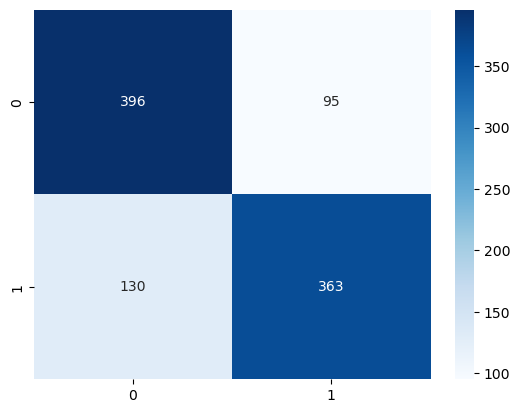

In [53]:
# plot confusion matrix for model A
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');


Observations:
- True positives: 396 (refers to model correctly prdicting the positive class)
- False postives: 95 (refers to model incorrectly predicting the positive class when the actual class was negative)
- False negative: 130 (refers to model incorrectly predicting the negative class when the actual class was positive)
- True negative: 363 (refers to model correctly predicteing the negative class)

#### Model B -  Multinomial Naive Bayes with TF-IDF Vectorizer

In [54]:
# create a pipeline

model_B = Pipeline(
    steps=[
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
    ]
)

In [55]:
# fit model
model_B.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [56]:
#Model performance - Scores for training set

y_train_pred = model_B.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print("Training accuracy:", train_acc)
print("Training precision:", train_precision)
print("Training recall:", train_recall)
print("Training F1 score:", train_f1)

Training accuracy: 0.8583531006438495
Training precision: 0.8633055747850307
Training recall: 0.8583531006438495
Training F1 score: 0.8578787379746662


In [57]:
#Model performance - Scores for training set

y_test_pred = model_B.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Test accuracy:", test_acc)
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)

Test accuracy: 0.766260162601626
Test precision: 0.7788076507171933
Test recall: 0.766260162601626
Test F1 score: 0.7636715453673122


Observations:
- Model is still overfitted.

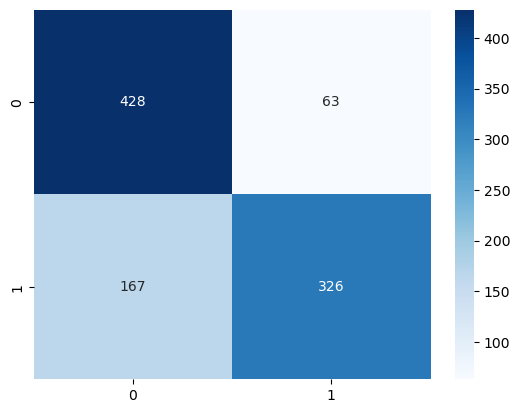

In [58]:
# plot confusion matrix for model B
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');


Observations:
- True positives: 428 (refers to model correctly prdicting the positive class)
- False postives: 63 (refers to model incorrectly predicting the positive class when the actual class was negative)
- False negative: 167 (refers to model incorrectly predicting the negative class when the actual class was positive)
- True negative: 326 (refers to model correctly predicteing the negative class)

In [59]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).

model_B_params = {
    'tfidf__max_features': [2_000, 3_000, 4_000, 5_000],
    'tfidf__stop_words': [None, 'english'],   
    'tfidf__ngram_range': [(1,1), (1,2)]  
}

In [60]:
# Instantiate GridSearchCV.

gs_tvec = GridSearchCV(model_B, 
                        param_grid = model_B_params, 
                        cv=5) 

In [61]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'tfidf__max_features': [2000, 3000, 4000, 5000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']})

In [62]:
# Score model on training set.
gs_tvec.score(X_train, y_train)

0.88376821416469

In [63]:
# Score model on testing set.
gs_tvec.score(X_test, y_test)

0.7936991869918699

In [64]:
# Showing all the steps in the pipeline
gs_tvec.best_estimator_

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', MultinomialNB())])

In [65]:
# Getting feature names from vectorizer in the first step
gs_tvec.best_estimator_.steps[0][1].get_feature_names_out()

array(['ability', 'able', 'able account', ..., 'yr old', 'zero',
       'zero debt'], dtype=object)

In [66]:
# Getting feature log probabilities for negative class from classifier
gs_tvec.best_estimator_.steps[1][1].feature_log_prob_[0]

array([-8.36224445, -7.34800714, -8.78971913, ..., -8.62058164,
       -8.17228797, -8.85720055])

In [67]:
# Getting feature log probabilities for positive class from classifier
gs_tvec.best_estimator_.steps[1][1].feature_log_prob_[1]

array([-8.60858574, -7.48315172, -9.18346327, ..., -8.71985358,
       -8.30468819, -8.83098747])

In [68]:
# Assigning classifier step to variable clf
clf = gs_tvec.best_estimator_.steps[1][1]

In [69]:
# Computing difference in log probabilities in the positive and negative class
delta_log_prob = clf.feature_log_prob_[1, :] - clf.feature_log_prob_[0, :]
delta_log_prob

array([-0.24634129, -0.13514457, -0.39374414, ..., -0.09927195,
       -0.13240021,  0.02621309])

In [70]:
# Creating result dataframe
result_df = pd.DataFrame(delta_log_prob, index = gs_tvec.best_estimator_[0].get_feature_names_out())

In [71]:
result_df.columns = ["log_prob_diff"]

In [72]:
result_df.sort_values(by = "log_prob_diff", ascending = False).head(30)

,log_prob_diff
social security,2.769252
gold,2.720328
retiring,2.639010
boomer,2.618043
senior,2.607584
baby boomer,2.574352
retired baby,2.471492
retire,2.448755
community,2.297842
security,2.202771


In [73]:
result_df.sort_values(by = "log_prob_diff", ascending = True).head(30)

,log_prob_diff
loan,-2.383800
car,-2.304952
credit card,-2.218591
credit score,-2.084566
credit,-2.028335
card,-1.910449
score,-1.876834
rent,-1.748649
airdrop,-1.722896
student,-1.695087


Observation: 
- While the accuracy scores of the model are fairly low (~76%), the model seems ok given that the words with the highest coefficients under the r/retirement nad r/FinancialPlanning are logical.

Examine Wrongly Classified Posts

In [74]:
# get the predicted probabilities for X_test
prob_predictions = model_B.predict_proba(X_test)

In [75]:
# create a Boolean mask for incorrect predictions
incorrect_mask = y_test != y_test_pred

In [76]:
# get the raw entries and their probability predictions that return False for y_test == y_test_pred
incorrect_entries_and_probs = list(zip(X_test[incorrect_mask], prob_predictions[incorrect_mask]))

In [77]:
# sort the incorrect entries and their probability predictions by the probability (in descending order)
incorrect_entries_and_probs_sorted = sorted(incorrect_entries_and_probs, key=lambda x: max(x[1]), reverse=True)

In [78]:
# print the sorted incorrect entries and their probability predictions
print("Incorrect entries and their probability predictions (sorted by probability):")
for entry, prob in incorrect_entries_and_probs_sorted:
    print(f"Entry: {entry}\nProbability predictions: {prob}\n")

Incorrect entries and their probability predictions (sorted by probability):
Entry: retire
Probability predictions: [0.08049524 0.91950476]

Entry: new financial please help recently getting active previous transferred fidelity account set auto management growth stock plan also recently working need advice guidance manage contribu transfer fidelity much advise
Probability predictions: [0.90590095 0.09409905]

Entry: receive trust cash silver gold mix
Probability predictions: [0.11413453 0.88586547]

Entry: rolled previous employer right sitting fidelity money market account higher day fund keep fund sure alrnative fund betr one currently sitting bit unfamiliar admit need research advice reference old different previous employer pretty decent amount money one current employer
Probability predictions: [0.87819446 0.12180554]

Entry: tax actual yield cash fund everyone different tax familiar concept safe withdral ra really wondering people retired minum capital base cash versus spent cash

Observation:
- Focusing on the bottom 20 entries with lowest probabilities (i.e. the  model predicted them wrongly with worst outcomes) to understand better understand the type of posts.
- Among these 20 entries, a handful of posts were empty perhaps because these posts were cleaned out after preprocessing. The contents of the remaining posts had overlaps in topics/context, hence the similar probabilities/ wrong classififcation. For example, 'pension versus life insurance' with predicted probabilities of 0.49565286 (associated with retirement) vs 0.50434714 (associated with financial planning) which would still be logical in the context of either subreddits.

#### Model C - GridSearch CV

In [79]:
X = df_combined['content_cleaned'].tolist()
y = df_combined['subreddit'].tolist()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [81]:
#Define hyperparamters
classifier_nb_params = {
    'classifier__alpha': [0.1, 0.5, 1],
}

classifier_lr_params = {
    'classifier__C': [0.1, 1, 10],
}

vectorizer_params = {
    'vectorizer__max_features': [1000, 2000, 3000, 4000],
    'vectorizer__ngram_range': [(1,1), (1,2), (1,3)],
    'vectorizer__min_df': [2,3,5],
    'vectorizer__max_df': [0.75, 0.80, 0.85],
}

In [82]:
#Define models by vectorizer and classifer
models = [
    {'name': 'CountVectorizer with MultinomialNB',
     'vectorizer': CountVectorizer(), 'classifier': MultinomialNB(),
     'params': {**classifier_nb_params, **vectorizer_params}},
    
    {'name': 'TfidVectorizer with MultinomialNB',
     'vectorizer': TfidfVectorizer(), 'classifier': MultinomialNB(),
     'params': {**classifier_nb_params, **vectorizer_params}},

    {'name': 'CountVectorizer with LogisticRegression',
     'vectorizer': CountVectorizer(), 'classifier': LogisticRegression(),
     'params': {**classifier_lr_params, **vectorizer_params}},
    
    {'name': 'TfidVectorizer with LogisticRegression',
     'vectorizer': TfidfVectorizer(), 'classifier': LogisticRegression(),
     'params': {**classifier_lr_params, **vectorizer_params}}


]

In [83]:
#Function to find best hyperparameters for each model, and to compare each model result
def evaluate_models(models):
    results = ''
    best_est = []
    for model in models:
        vectorizer = model['vectorizer']
        classifier = model['classifier']
        params = model['params']
        
        #Create pipeline
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        
        #GridSearch
        grid_search = GridSearchCV(pipeline, params, cv=5, n_jobs=-1) #5 folds CV, use all processors
        grid_search.fit(X_train, y_train)
        
        #Score
        train_score = grid_search.score(X_train, y_train)
        test_score = grid_search.score(X_test, y_test)
        
        #Get confusion matrix values
        preds = grid_search.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
        
        #Store best estimator
        best_est.append(grid_search.best_estimator_)
        
        #Store results
        results += f"{model['name']}:\n"
        results += f"Best Cross Val Params: {grid_search.best_params_}\n"
        results += f"Best Cross Val Score: {round(grid_search.best_score_, 3)}\n"
        results += f"Train Score: {round(train_score, 3)}\n"
        results += f"Test Score: {round(test_score, 3)} | TN: {tn} | FP: {fp} | FN: {fn} | TP: {tp}\n"
        results += f"Overfitted (test minus train): {round(test_score - train_score, 3)}\n\n"
    
    return results, best_est

In [84]:
#Evaluate models -  Approximately 10mins run time!
compare_results, best_est = evaluate_models(models)
print(compare_results)

/Users/sytan/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sytan/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

CountVectorizer with MultinomialNB:
Best Cross Val Params: {'classifier__alpha': 1, 'vectorizer__max_df': 0.75, 'vectorizer__max_features': 4000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 3)}
Best Cross Val Score: 0.761
Train Score: 0.836
Test Score: 0.77 | TN: 377 | FP: 114 | FN: 112 | TP: 381
Overfitted (test minus train): -0.066

TfidVectorizer with MultinomialNB:
Best Cross Val Params: {'classifier__alpha': 1, 'vectorizer__max_df': 0.75, 'vectorizer__max_features': 4000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 2)}
Best Cross Val Score: 0.78
Train Score: 0.879
Test Score: 0.798 | TN: 415 | FP: 76 | FN: 123 | TP: 370
Overfitted (test minus train): -0.081

CountVectorizer with LogisticRegression:
Best Cross Val Params: {'classifier__C': 1, 'vectorizer__max_df': 0.75, 'vectorizer__max_features': 4000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
Best Cross Val Score: 0.752
Train Score: 0.931
Test Score: 0.769 | TN: 368 | FP: 123 | FN: 104 | 

Observations:
- On balance, the best model is Model B (TfidVectorizer with MultinomialNB) given the highest test score and comparatively smaller delta/ overfitting.

## Model D - Gradient Boosting Model

In [85]:
X = tfidf_encoded
Y = np.array(df_combined['subreddit'])

In [86]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    stratify=Y
)

In [87]:
def gradient_boosting_model(x_train, y_train, x_test, y_test):
    model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100, random_state=2020, verbose=1)
    scores = cross_validate(model, x_train, y_train, scoring='accuracy', cv=2, return_train_score=True, verbose=1)

    model.fit(x_train, y_train)
    acc = accuracy_score(model.predict(x_test), y_test)
    
    return model, scores, acc

In [88]:
gb_model, gb_scores, gb_acc = gradient_boosting_model(x_train, y_train, x_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           1.3833            3.75s
         2           1.3804            2.42s
         3           1.3775            1.97s
         4           1.3747            1.77s
         5           1.3719            1.65s
         6           1.3692            1.55s
         7           1.3666            1.47s
         8           1.3640            1.41s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


         9           1.3614            1.36s
        10           1.3589            1.34s
        20           1.3359            1.08s
        30           1.3157            0.92s
        40           1.2971            0.77s
        50           1.2796            0.63s
        60           1.2636            0.50s
        70           1.2487            0.37s
        80           1.2348            0.25s
        90           1.2217            0.12s
       100           1.2096            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3835            1.24s
         2           1.3807            1.22s
         3           1.3780            1.19s
         4           1.3753            1.18s
         5           1.3727            1.16s
         6           1.3701            1.15s
         7           1.3676            1.14s
         8           1.3651            1.12s
         9           1.3627            1.10s
        10           1.3602            1.08s
        2

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s finished


         8           1.3659            2.19s
         9           1.3635            2.16s
        10           1.3612            2.14s
        20           1.3396            1.81s
        30           1.3205            1.57s
        40           1.3034            1.32s
        50           1.2878            1.10s
        60           1.2736            0.88s
        70           1.2602            0.66s
        80           1.2477            0.44s
        90           1.2361            0.22s
       100           1.2250            0.00s


In [89]:
print('Validation Accuracies: {}'.format(gb_scores['test_score']))
print('Test Accuracy: {}'.format(gb_acc))

Validation Accuracies: [0.68297332 0.6797967 ]
Test Accuracy: 0.6632782719186785


Observation: 
- Test scores even lower than Model B, therefore on balance will stick with the simpler model as the recommended model.

## Topic Modelling

To perform topic modelling for each subreddit to better understand each component, as well as overlaps if any.

In [90]:
#Define function to perform topic modelling

def lda(encoded, n_topic=10):
    lda = LatentDirichletAllocation(n_components=n_topic, verbose=1, random_state=2020)
    lda.fit(encoded)
    return lda

In [91]:
#Apply the lda function
lda10 = lda(cv_encoded, n_topic=10)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [92]:
# Print top 10 words associated with each topic
for idx, topic in enumerate(lda10.components_):
    words = [cv.get_feature_names_out()[topic_id] for topic_id in topic.argsort()[::-1][:10]]
    print('Topic {:2d} -> {}'.format(idx, words))

Topic  0 -> ['car', 'year', 'home', 'month', 'get', 'money', 'also', 'pay', 'much', 'currently']
Topic  1 -> ['financial', 'advice', 'plan', 'best', 'looking', 'advisor', 'life', 'know', 'money', 'doe']
Topic  2 -> ['account', 'stock', 'money', 'year', 'market', 'best', 'income', 'portfolio', 'inrest', 'investment']
Topic  3 -> ['retired', 'social', 'security', 'financial', 'people', 'life', 'age', 'work', 'health', 'get']
Topic  4 -> ['money', 'nt', 'need', 'help', 'know', 'start', 'one', 'make', 'advice', 'much']
Topic  5 -> ['job', 'retire', 'pension', 'year', 'work', 'get', 'money', 'house', 'plan', 'wife']
Topic  6 -> ['credit', 'debt', 'pay', 'loan', 'inrest', 'mortgage', 'card', 'paying', 'cash', 'get']
Topic  7 -> ['income', 'house', 'month', 'year', 'esta', 'save', 'property', 'invest', 'real', 'make']
Topic  8 -> ['fund', 'account', 'employer', 'index', 'contribu', 'vanguard', 'contribution', 'new', 'annuity', 'fidelity']
Topic  9 -> ['tax', 'income', 'traditional', 'account'

In [93]:
#Calculate topic distribution

topic_df = df_combined.copy()
length = df_combined['content_cleaned'].shape[0]
for idx, content in tqdm(enumerate(df_combined['content_cleaned'])):
    encoded = cv_encoded[idx]
    topics = lda10.transform(encoded)
    topic = topics.argsort()[0][::-1][0]

    topic_df.loc[idx, 'topic'] = topic
    topic_df.loc[idx, 'topic_value'] = topics[0][topic]

    if idx % 30000 == 0 or idx == length - 1:
        print('Topic {:2d}({:.6f}) {:}'.format(topic, topics[0][topic], content))
topic_df

0it [00:00, ?it/s]

Topic  1(0.699972) anyone community


3935it [00:02, 1750.03it/s]

Topic  4(0.970961) financial working starting financial new year despi already clear idea nt accomplish nt see people objective help get inspired see something crea bigger vision apart could inspiring could fun share


,title,selftext,subreddit,content,content_cleaned,topic,topic_value
0,Anyone who’s moved into a retirement (55+) com...,NaN,retirement,Anyone who’s moved into a retirement (55+) com...,anyone community,1.0,0.699972
1,Am I the only one out there wondering if I can...,"Seriously, with a small nest egg being managed...",retirement,Am I the only one out there wondering if I can...,one wondering ever retire seriously small nest...,4.0,0.599952
2,Your current status and your future wishes for...,I'll start\n\nLow 50's DINK's\n\nWife and I ha...,retirement,Your current status and your future wishes for...,current status future start low wife employed ...,5.0,0.614028
3,DIY investing of IRA during retirement. Who to...,After doing research on the difference in retu...,retirement,DIY investing of IRA during retirement. Who to...,use holding institution fund afr research diff...,2.0,0.513758
4,The r/retirement community has 19.8k members.,"From one (low) to ten (high), how important is...",retirement,The r/retirement community has 19.8k members. ...,community one low n high portant community par...,4.0,0.619595
...,...,...,...,...,...,...,...
3930,Home buying and DTI,NaN,FinancialPlanning,Home buying and DTI,home,0.0,0.549959
3931,Struggling to Pick a Financial Advisor After M...,Been shopping around for a financial advisor a...,FinancialPlanning,Struggling to Pick a Financial Advisor After M...,struggling pick financial advisor afr multiple...,1.0,0.962493
3932,25yo and £3k in debt with no savings,"I have a full time job, should i start paying ...",FinancialPlanning,25yo and £3k in debt with no savings I have a ...,debt full job start paying majority debt save ...,6.0,0.650651
3933,Struggling to Pick Financial Advisor,NaN,FinancialPlanning,Struggling to Pick Financial Advisor,struggling pick financial advisor,1.0,0.819993


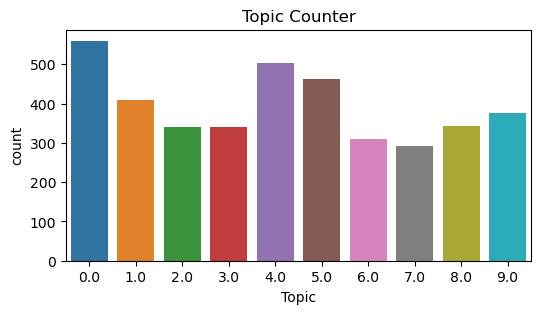

In [94]:
#Plot distribution of topics

plt.figure(figsize=(6, 3))
sns.countplot(x=topic_df['topic'])
plt.xlabel('Topic')
plt.title('Topic Counter')
plt.show()

In [95]:
fp = df_combined[df_combined['subreddit'] == 'FinancialPlanning']
rm = df_combined[df_combined['subreddit'] == 'retirement']

In [96]:
#Define function for scatterplot to visualize two subreddit categories
def scatter(data, x):
    fp = data[data['subreddit'] == 'FinancialPlanning']
    rm = data[data['subreddit'] == 'retirement']

    plt.figure(figsize=(6, 6))
    plt.scatter(x[fp.index, 0], x[fp.index, 1], color='red', label='Financial Planning')
    plt.scatter(x[rm.index, 0], x[rm.index, 1], color='blue', label='Retirement')
    plt.legend()
    plt.title('Sample 2-Dimension Features')
    plt.show()

In [97]:
#Define Singular Value Decomposition (SVD) for matrix factorization to reduce dimensionality and risk of overfitting
def svd(encoded, dimension=50):
    svd = TruncatedSVD(n_components=dimension, n_iter=10, random_state=2020)
    reduced = svd.fit_transform(encoded)
    return svd, reduced

In [98]:
svd50, svd50_reduced = svd(tfidf_encoded)

In [99]:
#Check that dimension has been reduced to 50
svd50_reduced.shape

(3935, 50)

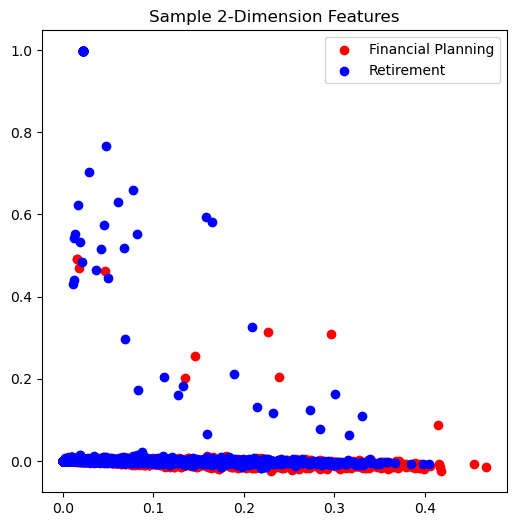

In [100]:
#Plot scatterplot
scatter(df_combined, svd50_reduced)

Observation:
- Expectedly, there is significant overlap for the features between the two classes retirement and financial planning as gleaned from the aforementioned findings.

## Recommendations and Conclusion

In summary, we note that: 
1) Individuals who are looking for advice on financial planning and retirement could consider using model B (TfidVectorizer with MultinomialNB) to direct their query to the relevant subreddit to glean insights relevant to their interest.
2) On balance, model B is recommended compared to the other models as based on the scores outlined below, the accuracy score for model B is higher than the baseline (model A) and it has the highest test accuracy and compartively lesser overfitting.
|Model|Type|Train Score|Test Score|Overfitting
|---|---|---|---|---|
|Model A| Multinomial Naive Bayes with Count Vectorizer| 0.84| 0.77| 0.07
|Model B| Multinomial Naive Bayes with Tfidf Vectorizer| 0.88| 0.80| 0.08
|Model C| Logistic Regression with Count Vectorizer| 0.93| 0.77| 0.16
|Model D| Logistic Regression with Tfidf Vectorizer| 0.88| 0.79| 0.09
|Model E| Gradient Boost| 0.69| 0.69| 0

3) Model B has limitations and only mediocre performance. It has 230 posts classified incorrectly. 
4) From examining the features from the two subreddits we note that there are significant overlaps. 
5) From examining the tokens of the posts with the lowest predicted probabilities, we note that due to the overlaps in featues this could have caused results to be unclear.
6) For future iterations of the study, we could consider (i) obtaining more data; (ii) consider financial sentiments.